In [1]:
# import required libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost


In [2]:
# load the dataset

train_data = pd.read_csv("train.csv")
test_data = pd.read_excel("test.xlsx")

# Data Cleaning 

In [3]:
train_data.shape, test_data.shape

((49999, 30), (24111, 29))

In [4]:
train_data.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,log_price,
0,6901257,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,5.010635,NaN
1,6304928,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,5.129899,NaN
2,7919400,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,4.976734,NaN
3,13418779,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,6.620073,NaN
4,3808709,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,4.744932,NaN


In [5]:
train_data.columns

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds', 'log_price', ' '],
      dtype='object')

In [6]:
train_data.drop([' ','thumbnail_url', 'latitude','longitude' ,'description', 'name','zipcode','neighbourhood'],axis=1,inplace=True)
test_data.drop([' ','thumbnail_url', 'latitude','longitude' ,'description', 'name','zipcode','neighbourhood'],axis=1,inplace=True)

In [7]:
train_data.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,number_of_reviews,review_scores_rating,bedrooms,beds,log_price
0,6901257,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,t,NaN,3/26/2012,f,7/18/2016,2,100.0,1.0,1.0,5.010635
1,6304928,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,f,100%,6/19/2017,t,9/23/2017,6,93.0,3.0,3.0,5.129899
2,7919400,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,t,100%,10/25/2016,t,9/14/2017,10,92.0,1.0,3.0,4.976734
3,13418779,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,t,NaN,4/19/2015,f,NaN,0,NaN,2.0,2.0,6.620073
4,3808709,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,t,100%,03-01-2015,t,1/22/2017,4,40.0,0.0,1.0,4.744932


In [8]:
test_data.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,number_of_reviews,review_scores_rating,bedrooms,beds
0,5979389,Apartment,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,strict,True,NYC,...,t,t,1.0,2015-05-29,f,NaT,0,NaN,1.0,1.0
1,13488121,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,moderate,True,LA,...,t,t,1.0,2015-08-17,f,2017-04-23,24,100.0,1.0,1.0
2,8121643,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,False,NYC,...,t,f,NaN,2012-06-18,f,NaT,0,NaN,1.0,1.0
3,16490010,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,NYC,...,t,t,1.0,2011-12-12,f,2017-09-24,12,98.0,1.0,1.0
4,16274069,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,moderate,True,NYC,...,t,f,1.0,2014-11-02,f,2017-09-14,13,92.0,2.0,3.0


# Exploratory Data Analysis

In [9]:
from matplotlib import pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

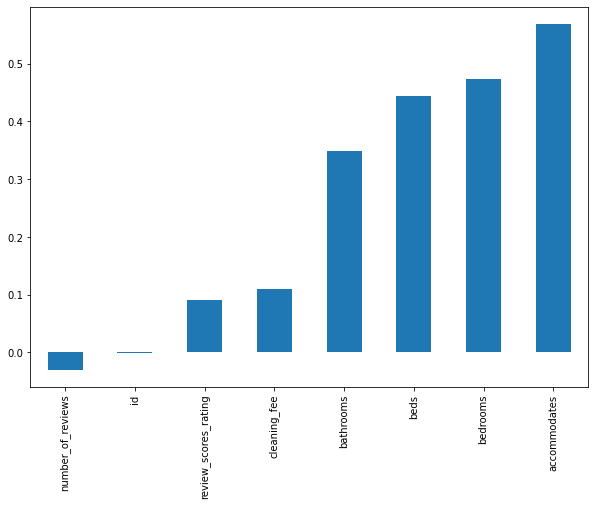

In [10]:
plt.figure(figsize=(10,7))
train_data.corr()['log_price'].sort_values().iloc[:-1].plot.bar();

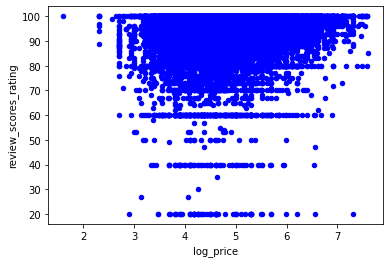

In [11]:
train_data.plot(kind = 'scatter' ,x = 'log_price',y = 'review_scores_rating',color='blue' )
plt.show()

In [12]:
train_data.corr()

,id,accommodates,bathrooms,cleaning_fee,number_of_reviews,review_scores_rating,bedrooms,beds,log_price
id,1.000000,-0.003457,0.002840,-0.003461,0.002851,0.001507,-0.004455,-0.007599,-0.000612
accommodates,-0.003457,1.000000,0.500622,0.181031,0.040093,-0.016286,0.707357,0.807453,0.568918
bathrooms,0.002840,0.500622,1.000000,0.055397,-0.039583,0.011580,0.583860,0.521524,0.348615
cleaning_fee,-0.003461,0.181031,0.055397,1.000000,0.106926,0.037181,0.105744,0.131194,0.109189
number_of_reviews,0.002851,0.040093,-0.039583,0.106926,1.000000,0.014217,-0.034978,0.030536,-0.029925
review_scores_rating,0.001507,-0.016286,0.011580,0.037181,0.014217,1.000000,0.008241,-0.028997,0.091194
bedrooms,-0.004455,0.707357,0.583860,0.105744,-0.034978,0.008241,1.000000,0.711560,0.474068
beds,-0.007599,0.807453,0.521524,0.131194,0.030536,-0.028997,0.711560,1.000000,0.444780
log_price,-0.000612,0.568918,0.348615,0.109189,-0.029925,0.091194,0.474068,0.444780,1.000000


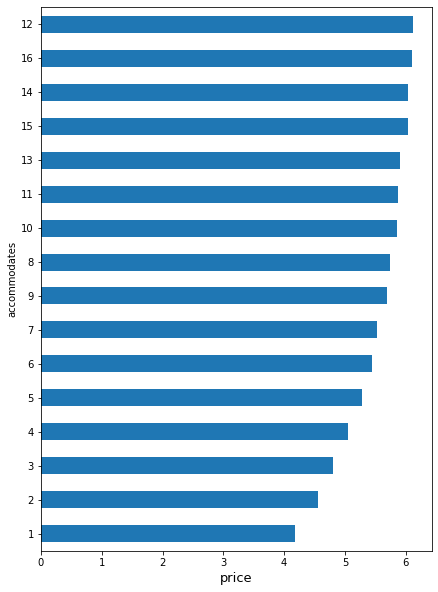

In [13]:
plt.figure(figsize=(7,10))
train_data.groupby("accommodates")["log_price"].mean().sort_values().plot.barh()
plt.xlabel('price', size=13);

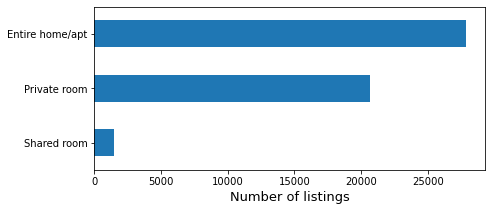

In [14]:
plt.figure(figsize=(7,3))

train_data.room_type.value_counts(ascending=True).plot.barh()
plt.xlabel('Number of listings', size=13);

In [15]:
train_data.groupby("room_type")["log_price"].mean()

room_type
Entire home/apt    5.168301
Private room       4.324253
Shared room        3.854384
Name: log_price, dtype: float64

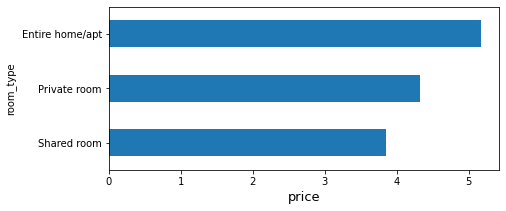

In [16]:
plt.figure(figsize=(7,3))
train_data.groupby("room_type")["log_price"].mean().sort_values().plot.barh()
plt.xlabel('price', size=13);

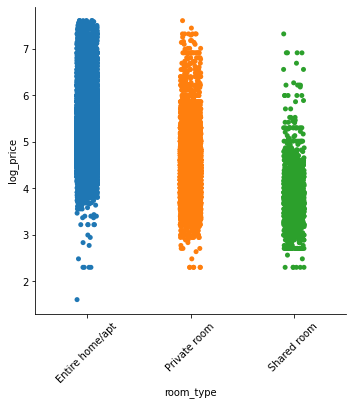

In [17]:
import seaborn as sns

sns.catplot(x="room_type", y="log_price", data=train_data)
plt.xticks(rotation=45);

In [18]:
#train_data
for col in train_data.select_dtypes(['object']).columns:
    print(col,':',train_data[col].isnull().sum())

property_type : 0
room_type : 0
amenities : 0
bed_type : 0
cancellation_policy : 0
city : 0
first_review : 10711
host_has_profile_pic : 127
host_identity_verified : 127
host_response_rate : 12338
host_since : 127
instant_bookable : 0
last_review : 10683


In [19]:
train_data.isnull().sum()

id                            0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   146
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
first_review              10711
host_has_profile_pic        127
host_identity_verified      127
host_response_rate        12338
host_since                  127
instant_bookable              0
last_review               10683
number_of_reviews             0
review_scores_rating      11301
bedrooms                     62
beds                         91
log_price                     0
dtype: int64

In [20]:
train_data['property_type'].nunique()

32

In [21]:
test_data['property_type'].nunique()

32

In [22]:
# train_data
train_data['host_response_rate']=train_data['host_response_rate'].str.replace("%","")

# test_data
test_data['host_response_rate']=train_data['host_response_rate'].str.replace("%","")

In [23]:
#train_data
train_data["instant_bookable"]=np.where(train_data["instant_bookable"]=="t",1,0)
train_data["cleaning_fee"]=np.where(train_data["cleaning_fee"]=="True",1,0)
train_data["host_has_profile_pic"]=np.where(train_data["host_has_profile_pic"]=="t",1,0)
train_data['host_identity_verified']=np.where(train_data['host_identity_verified']=="t",1,0)

#test_data
test_data["instant_bookable"]=np.where(test_data["instant_bookable"]=="t",1,0)
test_data["cleaning_fee"]=np.where(test_data["cleaning_fee"]=="True",1,0)
test_data["host_has_profile_pic"]=np.where(test_data["host_has_profile_pic"]=="t",1,0)
test_data['host_identity_verified']=np.where(test_data['host_identity_verified']=="t",1,0)

In [24]:
#function to replace list of emenities with number of amenities in the list
# train_data
def amenities_num(var):
  return (len(var.split(',')))
train_data['amenities'] = train_data.amenities.apply(amenities_num)

# test_data
def amenities_num(var):
  return (len(var.split(',')))
test_data['amenities'] = test_data.amenities.apply(amenities_num)

In [25]:
train_data['amenities'].nunique()

68

In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24111 entries, 0 to 24110
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      24111 non-null  int64         
 1   property_type           24111 non-null  object        
 2   room_type               24111 non-null  object        
 3   amenities               24111 non-null  int64         
 4   accommodates            24111 non-null  int64         
 5   bathrooms               24057 non-null  float64       
 6   bed_type                24111 non-null  object        
 7   cancellation_policy     24111 non-null  object        
 8   cleaning_fee            24111 non-null  int32         
 9   city                    24111 non-null  object        
 10  first_review            18958 non-null  datetime64[ns]
 11  host_has_profile_pic    24111 non-null  int32         
 12  host_identity_verified  24111 non-null  int32 

In [27]:
#train data
train_data['Current Year']=2021
train_data['last_review']=pd.DatetimeIndex(train_data['last_review']).year
train_data['last_review_years']=train_data['Current Year']- train_data['last_review']

#test data
test_data['Current Year']=2021
test_data['last_review']=pd.DatetimeIndex(test_data['last_review']).year
test_data['last_review_years']=test_data['Current Year']- test_data['last_review']

In [28]:
train_data['Current Year']=2021
train_data['host_since']=pd.DatetimeIndex(train_data['host_since']).year
train_data['host_since_years']=train_data['Current Year']- train_data['host_since']

test_data['Current Year']=2021
test_data['host_since']=pd.DatetimeIndex(test_data['host_since']).year
test_data['host_since_years']=test_data['Current Year']- test_data['host_since']

In [29]:
#train_data
train_data.drop(['first_review','last_review','Current Year','host_since'],axis=1,inplace=True)

#test_data
test_data.drop(['first_review','last_review','Current Year','host_since'],axis=1,inplace=True)

In [30]:
#train_data(numeric conversion)
for col in ['host_since_years','host_response_rate']:
    train_data[col]=pd.to_numeric(train_data[col],errors='coerce')

#test_data(numeric conversion)
for col in ['host_since_years','host_response_rate']:
    test_data[col]=pd.to_numeric(test_data[col],errors='coerce')

In [31]:
#train_data( handling missing values)
train_data['bathrooms'].fillna(train_data['bathrooms'].mode()[0], inplace = True)
train_data['review_scores_rating'].fillna(train_data['review_scores_rating'].mode()[0], inplace = True)
train_data['beds'].fillna(train_data['beds'].mode()[0], inplace = True)
train_data['bedrooms'].fillna(train_data['bedrooms'].mode()[0], inplace = True)
train_data['host_response_rate'].fillna(train_data['host_response_rate'].mode()[0], inplace = True)
train_data['host_since_years'].fillna(train_data['host_since_years'].mode()[0], inplace = True)
train_data['last_review_years'].fillna(train_data['last_review_years'].mode()[0], inplace = True)

#test_data( handling missing values)
test_data['bathrooms'].fillna(test_data['bathrooms'].mode()[0], inplace = True)
test_data['review_scores_rating'].fillna(test_data['review_scores_rating'].mode()[0], inplace = True)
test_data['beds'].fillna(test_data['beds'].mode()[0], inplace = True)
test_data['bedrooms'].fillna(test_data['bedrooms'].mode()[0], inplace = True)
test_data['host_response_rate'].fillna(test_data['host_response_rate'].mode()[0], inplace = True)
test_data['host_since_years'].fillna(test_data['host_since_years'].mode()[0], inplace = True)
test_data['last_review_years'].fillna(test_data['last_review_years'].mode()[0], inplace = True)

In [32]:
#train data (check missing values)
train_data.isnull().sum()

id                        0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
instant_bookable          0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
log_price                 0
last_review_years         0
host_since_years          0
dtype: int64

In [33]:
#train_data( create dummies to the categorical varaibles)

for col in train_data.select_dtypes(['object']).columns:
    print(col,':',train_data[col].nunique())

property_type : 32
room_type : 3
bed_type : 5
cancellation_policy : 5
city : 6


In [34]:
for col in ['property_type','room_type','bed_type','cancellation_policy','city']:
    
    temp=pd.get_dummies(train_data[col],prefix=col,drop_first=True)
    train_data=pd.concat([temp,train_data],1)
    train_data.drop([col],1,inplace=True)
    

In [35]:
#test_data( create dummies to the categorical varaibles)
for col in test_data.select_dtypes(['object']).columns:
    print(col,':',test_data[col].nunique())

property_type : 32
room_type : 3
bed_type : 5
cancellation_policy : 5
city : 6


In [36]:
for col in ['property_type','room_type','bed_type','cancellation_policy','city']:
    
    temp=pd.get_dummies(test_data[col],prefix=col,drop_first=True)
    test_data=pd.concat([temp,test_data],1)
    test_data.drop([col],1,inplace=True)
    

In [37]:
test_data.shape, train_data.shape

((24111, 61), (49999, 62))

In [38]:
#train_data(save the claning data)
train_data.to_csv('Airbnb_train_cleandata.csv', index =False)

In [39]:
#train_data(save the claning data)
test_data.to_csv('Airbnb_test_cleandata.csv', index=False)